In [ ]:
# je vais commencer par charger mes fichiers à nettoyer 
import pandas as pd
import numpy as np
pn = pd.read_csv("production_noel.csv")
pu = pd.read_csv("pollution_usines.csv")

# je vais afficher les 15 premieres lignes de chaque fichier pour avoir un apercu de mes donnees
print(pn.head(15))
print(pu.head(15))

          Date Nom_Usine Production_Journaliere
0   01-12-2024   Usine_A                    985
1   01-12-2024   Usine_B                    460
2   01-12-2024   Usine_C              512 items
3   02-12-2024   Usine_A                   1017
4   02-12-2024   Usine_B                    470
5   02-12-2024   Usine_C              536 items
6   03-12-2024   Usine_A                   1115
7   03-12-2024   Usine_B                    496
8   03-12-2024   Usine_C                    509
9   04-12-2024   Usine_A                    996
10  04-12-2024   Usine B              517 items
11  04-12-2024   Usine_C              520 items
12  05-12-2024   Usine_A                   1164
13  05-12-2024   Usine B                    559
14  05-12-2024   Usine_C                    568
   Date_Releve Ref_Usine  Indice_Pollution_PM25
0   2024/12/01   Usine_A              96.963710
1   2024/12/01   Usine_B              43.248154
2   2024/12/01   Usine_C              45.444122
3   2024/12/02   Usine_A             112

In [2]:
# je vais voir ce que pandas pense de mes colonnes
print(pn.info())
print(pu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    77 non-null     object
 1   Nom_Usine               77 non-null     object
 2   Production_Journaliere  77 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_Releve            72 non-null     object 
 1   Ref_Usine              72 non-null     object 
 2   Indice_Pollution_PM25  65 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.8+ KB
None


In [ ]:
#ici on a plusieurs problemes à resoudre:commencons avec le probleme de usine_b, usine_B etc les noms doivent etre uniformes
pn['Nom_Usine'] = pn['Nom_Usine'].str.lower()
pu['Ref_Usine'] = pu['Ref_Usine'].str.lower()

In [ ]:
#je vais m'assurer que les noms sont bien uniformes
print(pn['Nom_Usine'].unique())
print(pu['Ref_Usine'].unique())

['usine_a' 'usine_b' 'usine_c' 'usine b' 'usine c' 'usine a']
['usine_a' 'usine_b' 'usine_c']


In [ ]:
#maintenant je vais nettoyer la colonne production car jai des mots comme items qui n'ont pas leur place dans une colonne numerique
pn["Production_Journaliere"] = pn["Production_Journaliere"].str.replace(' items', '')
print(pn["Production_Journaliere"].unique())
pn["Production_Journaliere"] = pn["Production_Journaliere"].astype(int)
print(pn.info())

['985' '460' '512' '1017' '470' '536' '1115' '496' '509' '996' '517' '520'
 '1164' '559' '568' '1072' '580' '507' '1031' '556' '527' '1256' '631'
 '629' '1071' '565' '635' '1278' '540' '602' '1177' '630' '589' '1304'
 '567' '645' '1293' '655' '606' '1352' '663' '681' '1320' '598' '644'
 '1342' '697' '704' '1453' '703' '729' '1331' '646' '656' '1435' '727'
 '730' '1437' '708' '679' '1472' '756' '698' '1359' '775' '734' '1581'
 '770' '765' '1532' '752' '712']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    77 non-null     object
 1   Nom_Usine               77 non-null     object
 2   Production_Journaliere  77 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB
None


In [10]:
#maintenant jai un probleme de date car les dates ne sont pas au meme format dans les deux fichiers
pn['Date'] = pd.to_datetime(pn['Date'], format='%d-%m-%Y')
pu['Date_Releve'] = pd.to_datetime(pu['Date_Releve'], format='%Y/%m/%d')
print(pn.info())
print(pu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    77 non-null     datetime64[ns]
 1   Nom_Usine               77 non-null     object        
 2   Production_Journaliere  77 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date_Releve            72 non-null     datetime64[ns]
 1   Ref_Usine              72 non-null     object        
 2   Indice_Pollution_PM25  65 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ KB
None


In [ ]:
#dans le fichier pollution on voit quil y a des valeurs manquantes dans la colonne Indice_Pollution_PM25
print(pu['Indice_Pollution_PM25'].isnull().sum())
#je vais les remplacer par la moyenne de la colonne
mean_pollution = pu['Indice_Pollution_PM25'].mean()
pu['Indice_Pollution_PM25'] = pu['Indice_Pollution_PM25'].fillna(mean_pollution)
print(pu['Indice_Pollution_PM25'].isnull().sum())


0
0


In [ ]:
#maintenant je vais fussioner les deux fichiers 
df_final = pd.merge(
    pn,                  # Fichier de gauche (Production)
    pu,                  # Fichier de droite (Pollution)
    left_on=['Date', 'Nom_Usine'],      # Les clés dans 'pn'
    right_on=['Date_Releve', 'Ref_Usine'], # Les clés dans 'pu'
    how='inner'          # l'intersection seulement
)

# les resultats
print(f"Nombre de lignes fusionnées : {len(df_final)}")
display(df_final.head())

Nombre de lignes fusionnées : 70


,Date,Nom_Usine,Production_Journaliere,Date_Releve,Ref_Usine,Indice_Pollution_PM25
0,2024-12-01,usine_a,985,2024-12-01,usine_a,96.963710
1,2024-12-01,usine_b,460,2024-12-01,usine_b,43.248154
2,2024-12-01,usine_c,512,2024-12-01,usine_c,45.444122
3,2024-12-02,usine_a,1017,2024-12-02,usine_a,112.061784
4,2024-12-02,usine_b,470,2024-12-02,usine_b,59.090150


In [17]:
#maintenant je vais voir sil a une correlation entre la production et le taux de pollution
# Calcul de la matrice de corrélation
correlation = df_final[['Production_Journaliere', 'Indice_Pollution_PM25']].corr()

print("\n--- MATRICE DE CORRÉLATION ---")
display(correlation)


--- MATRICE DE CORRÉLATION ---


,Production_Journaliere,Indice_Pollution_PM25
Production_Journaliere,1.00000,0.85791
Indice_Pollution_PM25,0.85791,1.00000


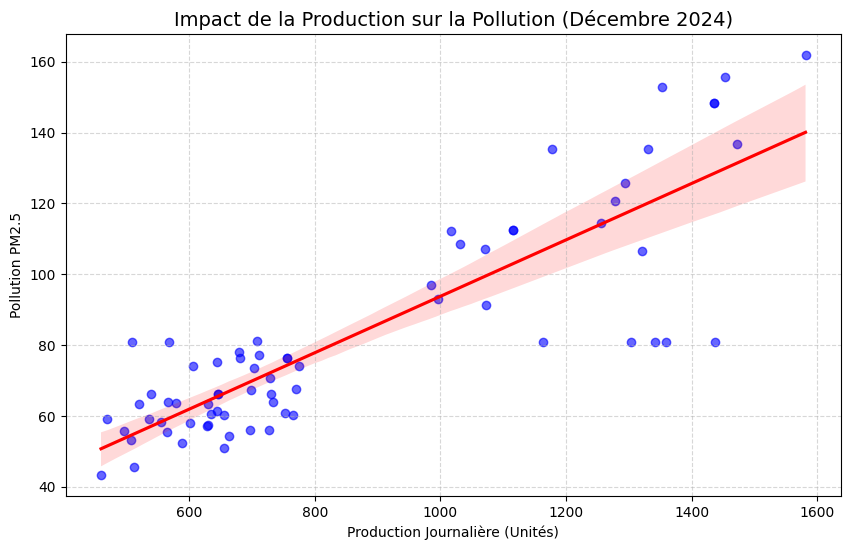

In [21]:
#pour une image visuelle
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# jutilise Seaborn pour tracer les points ET la ligne de tendance
sns.regplot(x='Production_Journaliere', y='Indice_Pollution_PM25', data=df_final, 
            scatter_kws={'color': 'blue', 'alpha': 0.6},
            line_kws={'color': 'red'}) 

plt.title('Impact de la Production sur la Pollution (Décembre 2024)', fontsize=14)
plt.xlabel('Production Journalière (Unités)')
plt.ylabel('Pollution PM2.5')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()